In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

2024-03-29 11:09:46.775063: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.models import load_model

model = load_model('./models/model_X.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step


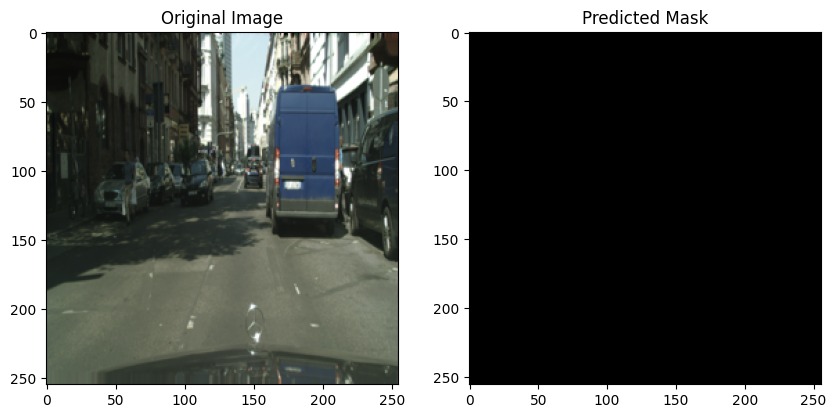

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

input_shape = (256, 256, 3)

def predict_image(model, image_path, threshold=0.2):
    image = img_to_array(Image.open(image_path).convert('RGB').resize(input_shape[:2]))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    mask = model.predict(image)
    binary_mask = np.where(mask >= threshold, 1, 0)
    return binary_mask[0]
    #return mask[0]

image_path = './images_val/frankfurt_000001_031416.png'
predicted_mask = predict_image(model, image_path)

img = Image.open(image_path)
img = img.resize((255, 255))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[:, :, 0], cmap='gray')  # Utiliser 'gray' pour une colormap binaire
plt.title('Predicted Mask')

plt.show()

In [6]:
input_shape = (256, 256, 3)

def predict_image(model, image_path, threshold=0.2):
    image = img_to_array(Image.open(image_path).convert('RGB').resize(input_shape[:2]))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    mask = model.predict(image)
    #binary_mask = np.where(mask >= threshold, 1, 0)
    #return binary_mask[0]
    return mask

image_path = './images_val/frankfurt_000001_031416.png'
predicted_mask = predict_image(model, image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


In [8]:
predicted_mask.shape

(1, 256, 256, 8)

In [11]:
mask1 = predicted_mask[0].copy()

In [12]:
mask1.shape

(256, 256, 8)

In [13]:
mask1[0,0]

array([0.11679252, 0.17254986, 0.10262731, 0.13166556, 0.1120493 ,
       0.138468  , 0.11689301, 0.10895444], dtype=float32)

In [14]:
predicted_class = np.argmax(mask1[0, 0])
predicted_class

1

In [16]:
predicted_class = np.argmax(mask1[1, 125])
predicted_class

1

In [18]:
mask1[125, 126]

array([0.06657346, 0.43620053, 0.04173282, 0.12695573, 0.05091013,
       0.14919186, 0.06991806, 0.05851739], dtype=float32)

In [38]:
mask1[240, 50]

array([0.03377835, 0.64001256, 0.0175027 , 0.09577846, 0.02416352,
       0.12082121, 0.03814464, 0.02979851], dtype=float32)